In [1]:
from sklearn import svm, datasets
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)
%matplotlib inline

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


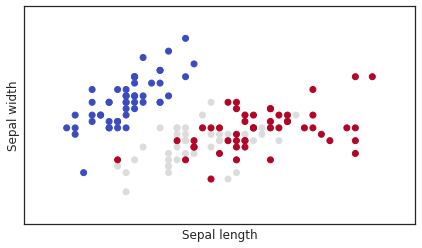

In [2]:
iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size = 0.2, random_state = 0)

scaler = StandardScaler()
xTrainStd = scaler.fit_transform(xTrain)
xTestStd = scaler.transform(xTest)

pca = PCA(0.95)
xTrainStd = pca.fit_transform(xTrain)
xTestStd = pca.transform(xTest)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


plt.figure(2, figsize=(7, 4))

plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target

df['species'] = df['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
df.head()



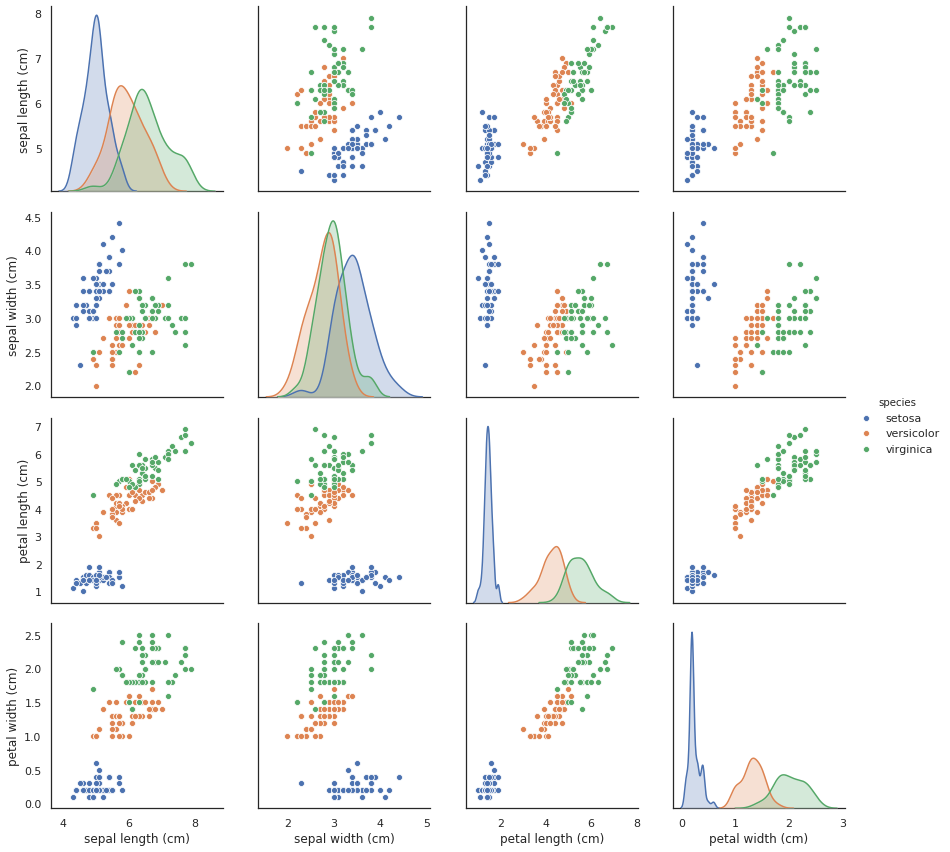

In [3]:
sns.pairplot(df.drop("target", axis=1), hue="species", size=3)

"''ANSWER:We observe that the  Iris Setosa lies far apart from Iris versicolor \nand Iris virginica and is easily separable. \nThe classes Iris versicolor and Iris virginica lie more closely to each other \npetal length and petal width shows a clear distinct boundary"

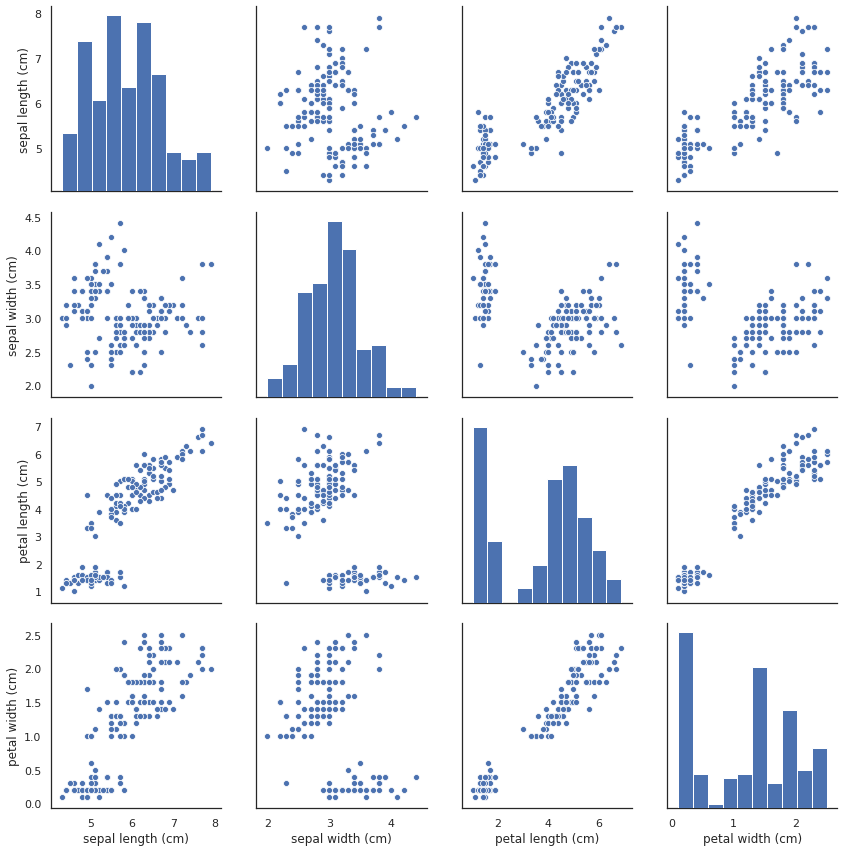

In [4]:
sns.pairplot(df.drop("target", axis=1),size=3,palette='tab20b')
# 1)(a)	For every pair of (different) features in the dataset 
# (there are 4). Which pair separates the data easily?
'''''ANSWER:We observe that the  Iris Setosa lies far apart from Iris versicolor 
and Iris virginica and is easily separable. 
The classes Iris versicolor and Iris virginica lie more closely to each other 
petal length and petal width shows a clear distinct boundary'''''


In [5]:
from sklearn.metrics import confusion_matrix

classifier = SVC()

classifier.fit(xTrainStd, yTrain)

predicted_labels = classifier.predict(xTestStd)

expected_labels = yTest

# print("Expected and Predicted labels")
# print(expected_labels,"\n\n", predicted_labels)

accuracy = classifier.score(xTestStd, expected_labels)

print("Accuracy:",accuracy)

print(confusion_matrix(expected_labels, predicted_labels))
print(classification_report(expected_labels, predicted_labels))

Accuracy: 0.6333333333333333
[[11  0  0]
 [ 0  5  8]
 [ 0  3  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.62      0.38      0.48        13
           2       0.27      0.50      0.35         6

    accuracy                           0.63        30
   macro avg       0.63      0.63      0.61        30
weighted avg       0.69      0.63      0.64        30



In [6]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
OVR=OneVsRestClassifier(LogisticRegression()).fit(X,Y)
print('OVR accuracy is %.3f' % OVR.score(xTest,yTest))

OVR accuracy is 0.600


In [7]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
OVO=OneVsOneClassifier(LogisticRegression()).fit(X,Y)
print('OVO accuracy is %.3f' % OVO.score(xTest,yTest))

# b) Using One-vs-Rest and using One-vs-One. Which one fits better? 
# Which one is easier to compute? Why?
'''''ANSWER=OVO as it has higher accuracy'''''

OVO accuracy is 0.667


"''ANSWER=OVO as it has higher accuracy"

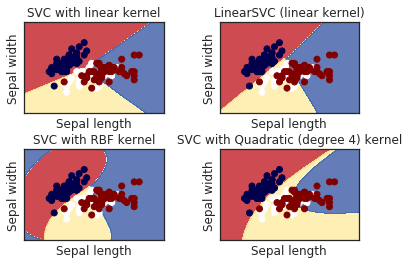

In [8]:
from sklearn.svm import SVC# SVC with linear kernel
C=1
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, Y)
# SVC with RBF kernel
poly_svc = svm.SVC(kernel='poly', degree=4, C=C).fit(X, Y)
# SVC with polynomial (degree 3) kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
h=.02
# create a mesh to plot in
xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h),
                        np.arange(ymin, ymax, h))
# title for the plots
titles = ['SVC with linear kernel',
   'LinearSVC (linear kernel)',
    'SVC with RBF kernel',
    'SVC with Quadratic (degree 4) kernel']
  
for i, clf in enumerate((lin_svc,svc, rbf_svc, poly_svc)):
# Plot the decision boundary. 
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.seismic)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()